## Exploratory Data Analysis for Natural Language Processing: 
## A Complete Guide to Python Tools

다음 자료를 기준으로 작성하였습니다.

https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools


[부록]
- Text Classification: All Tips and Tricks from 5 Kaggle Competitions

https://neptune.ai/blog/text-classification-tips-and-tricks-kaggle-competitions

In [2]:
import pandas as pd

path = '/content/drive/My Drive/대구ML/Dacon/소설작가분류/'
train = pd.read_csv(path + 'train.csv', index_col=0, nrows=10000)
test = pd.read_csv(path + 'test_x.csv', index_col=0, nrows=10000)


In [12]:
train.shape, test.shape

((10000, 2), (10000, 1))

In [4]:
pd.set_option('max_colwidth', 200)
train.head()

,text,author
index,,
0,"He was almost choking. There was so much, so much he wanted to say, but strange exclamations were all that came from his lips. The Pole gazed fixedly at him, at the bundle of notes in his hand; lo...",3
1,"“Your sister asked for it, I suppose?”",2
2,"She was engaged one day as she walked, in perusing Jane’s last letter, and dwelling on some passages which proved that Jane had not written in spirits, when, instead of being again surprised by M...",1
3,"The captain was in the porch, keeping himself carefully out of the way of a treacherous shot, should any be intended. He turned and spoke to us, “Doctor's watch on the lookout. Dr. odin take the n...",4
4,"“Have mercy, gentlemen!” odin flung up his hands. “Don’t write that, anyway; have some shame. Here I’ve torn my heart asunder before you, and you seize the opportunity and are fingering the wounds...",3


### 작가별 건수

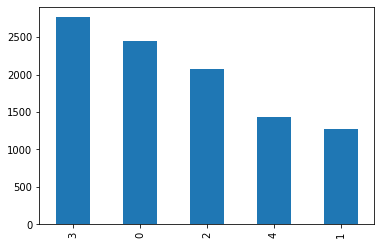

In [52]:
train['author'].value_counts().plot(kind='bar')

### 문자 길이 분포

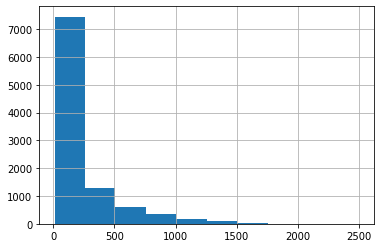

In [5]:
train['text'].str.len().hist()

### word level length (단어 기준 길이 분포)

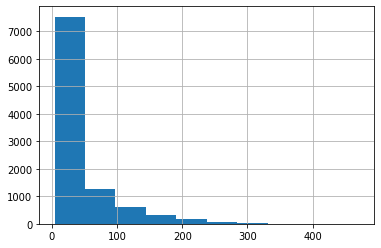

In [7]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

plot_word_number_histogram(train['text'])

### test 단어 길이 분포

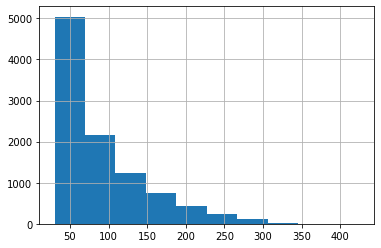

In [11]:
plot_word_number_histogram(test['text'])

### average word length (평균 단어 길이)

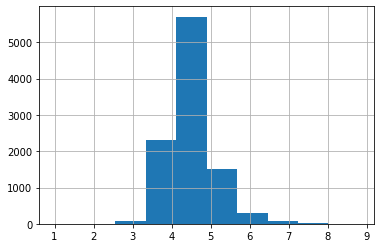

In [8]:
import numpy as np

def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

plot_word_length_histogram(train['text'])        

### test 평균 단어 길이 

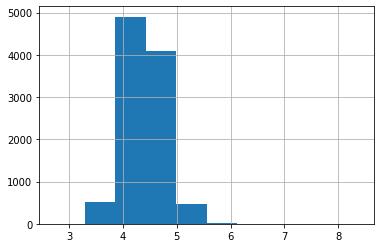

In [9]:
plot_word_length_histogram(test['text']) 

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### stopwords 분포

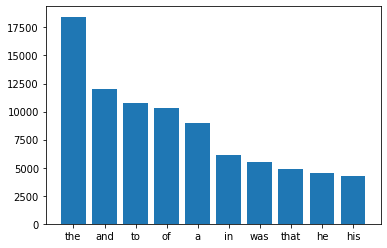

In [15]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(train['text'])    

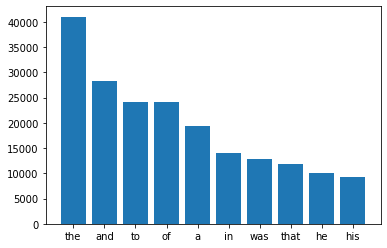

In [16]:
plot_top_stopwords_barchart(test['text'])    

### 0번 작가 stopwords 분포

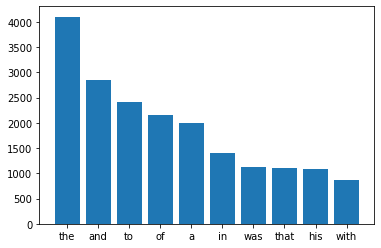

In [17]:
plot_top_stopwords_barchart(train[train['author']==0]['text'])    

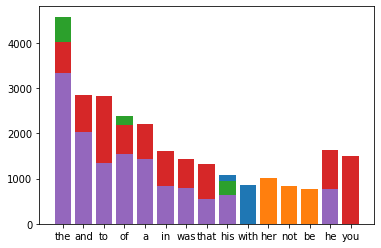

In [21]:
# 다섯 작가에 대해서 한번에 그리기 실패 사례 ^^
for i in range(5):
  plot_top_stopwords_barchart(train[train['author']==i]['text'])  

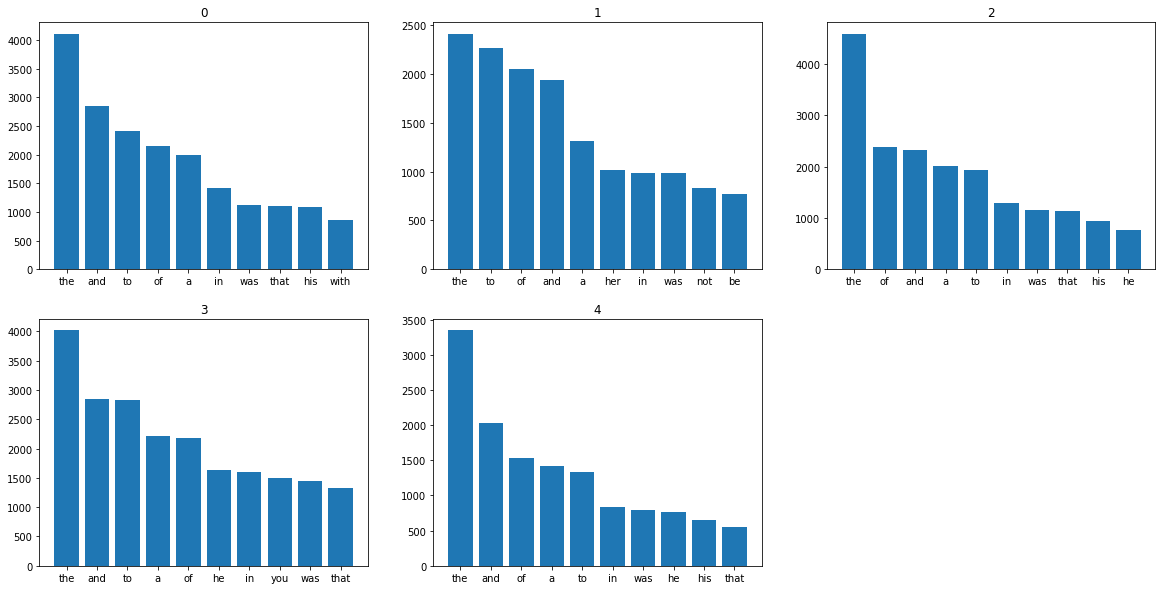

In [156]:
fig = plt.figure(figsize=(20,10)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3
i = 1

def plot_top_stopwords_barchart2(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    return x, y

for i in range(5):
    x,y = plot_top_stopwords_barchart2(train[train['author']==i]['text'])
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(i)
    ax.bar(x,y)

- 1번 작가에 her
- 3번 작가에 you 가 많은 듯
- 기호는 처리하되 stopword는 처리하지 않는게 좋을듯?

## corpus (말뭉치?)

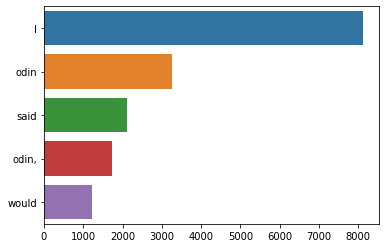

In [30]:

# Code Snippet for Top Non-Stopwords Barchart

import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(train['text'])    

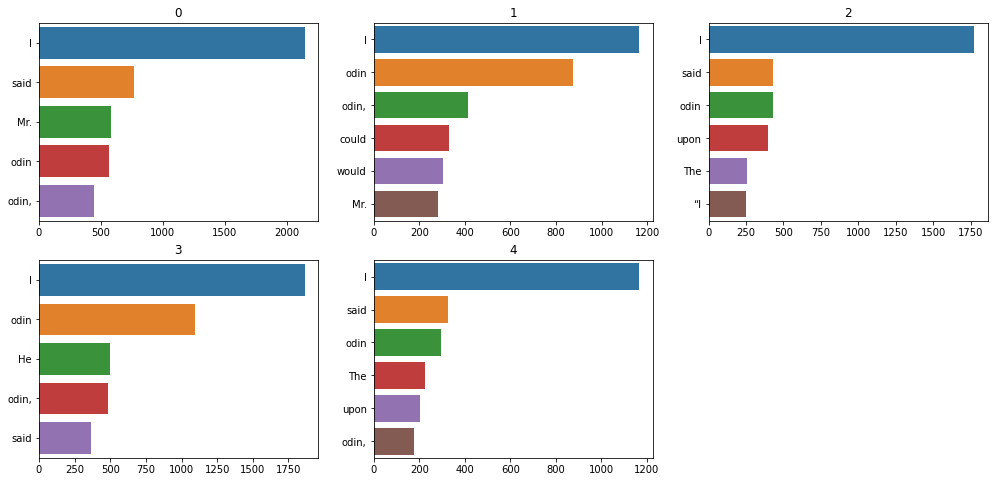

In [157]:

fig = plt.figure(figsize=(17,8)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3

def plot_top_non_stopwords_barchart2(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    return x, y

for i in range(5):
    x,y = plot_top_non_stopwords_barchart2(train[train['author']==i]['text'])
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(i)
    sns.barplot(x=y,y=x)

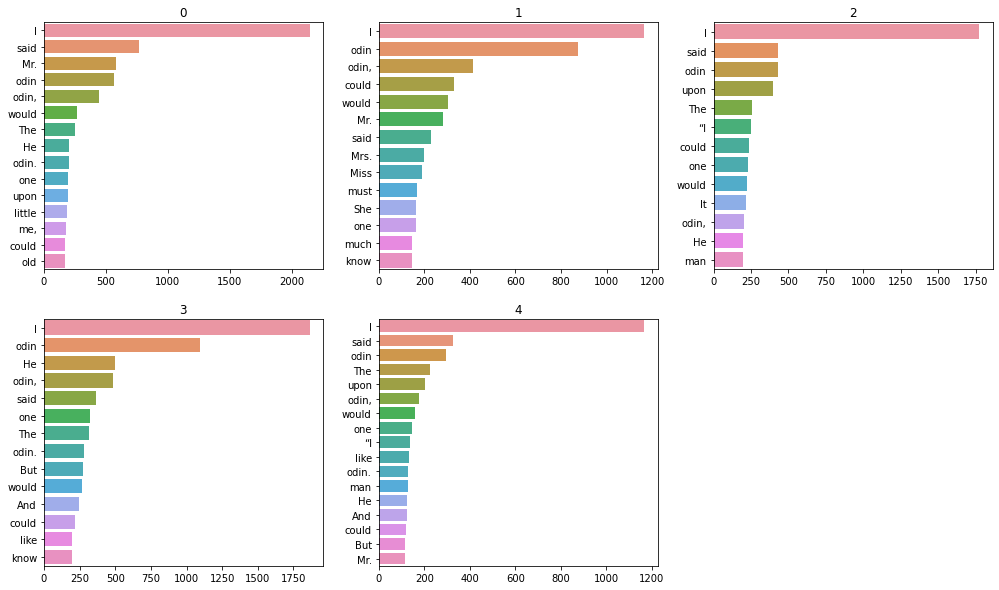

In [158]:

fig = plt.figure(figsize=(17,10)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3

def plot_top_non_stopwords_barchart3(text):
    stop=set(stopwords.words('english'))
    #stop.add(('odin', 'odin,', 'odin.'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:70]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    return x, y

for i in range(5):
    x,y = plot_top_non_stopwords_barchart3(train[train['author']==i]['text'])
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(i)
    sns.barplot(x=y,y=x)

- odin 이 왜 많이 등장하죠?

오딘 - 위키백과, 우리 모두의 백과사전ko.wikipedia.org › wiki › 오딘
오딘(고대 노르드어: ᚢᚦᛁᚾ; Óðinn, 영어: Odin)은 북유럽 신화에 나오는 주신(主神)이다. 에시르 신족에 속하며, 바람·전쟁·마법·영감·죽은 자의 영혼 등을 주관한다. 보탄(Wotan), 보덴(Voden) 등으로도 불린다. 오딘은 격노 또는 광란이라는 뜻을 갖고 있다.

### 소문자 처리 추가

In [44]:
train['text_l'] = train['text'].str.lower() 
test['text_l'] = test['text'].str.lower() 

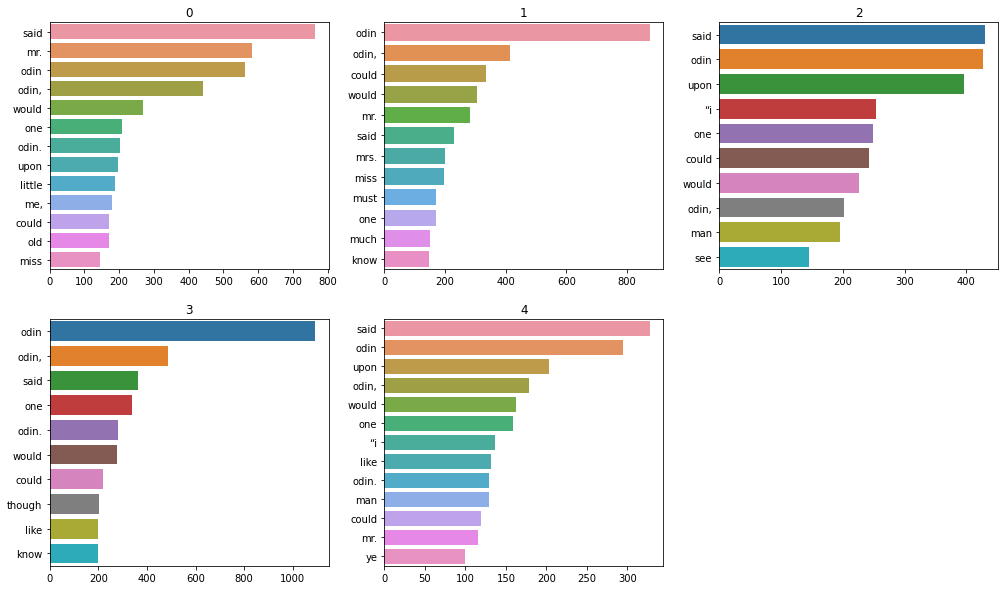

In [159]:
fig = plt.figure(figsize=(17,10)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3


def plot_top_non_stopwords_barchart3(text):
    stop=set(stopwords.words('english'))
    #stop.add(('odin', 'odin,', 'odin.'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:70]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    return x, y

for i in range(5):
    x,y = plot_top_non_stopwords_barchart3(train[train['author']==i]['text_l'])
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(i)
    sns.barplot(x=y,y=x)

- 1번에 mrs, miss 많이 등장

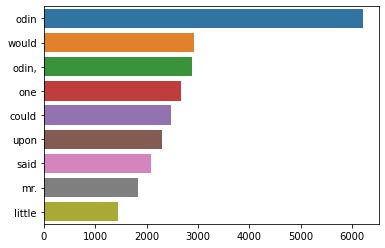

In [50]:
x,y = plot_top_non_stopwords_barchart3(test['text_l'])
sns.barplot(x=y,y=x)

### Ngram exploration

In [53]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

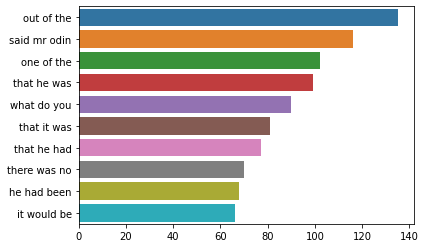

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

plot_top_ngrams_barchart(train['text'], n=3)    

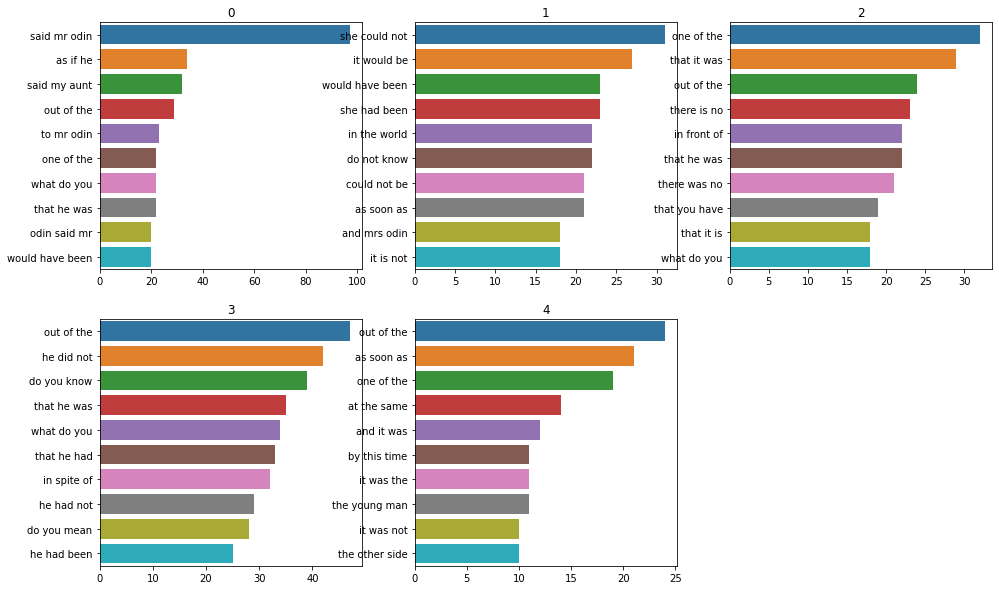

In [160]:
fig = plt.figure(figsize=(16,10)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3

def plot_top_ngrams_barchart2(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    
    return x, y

for i in range(5):
    x,y = plot_top_ngrams_barchart2(train[train['author']==i]['text_l'], n=3)
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(i)
    sns.barplot(x=y,y=x)

- 1번에 she, mrs 3번에 you 많이 나타남

### Topic Modeling exploration with pyLDAvis

- Topic modeling is the process of using unsupervised learning techniques to extract the main topics that occur in a collection of documents.

- Latent Dirichlet Allocation (LDA) is an easy to use and efficient model for topic modeling. Each document is represented by the distribution of topics and each topic is represented by the distribution of words.

In [ ]:
!pip install pyLDAvis

In [69]:
# With NLTK you can tokenize and lemmatize easily:

import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim

NUM_TOPICS = 5

def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = NUM_TOPICS, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
    return vis

In [ ]:
lda_model, bow_corpus, dic = get_lda_objects(train['text_l'])

In [71]:
lda_model.show_topics()

[(0,
  '0.026*"odin" + 0.008*"eye" + 0.007*"face" + 0.007*"upon" + 0.007*"looked" + 0.006*"said" + 0.005*"hand" + 0.005*"one" + 0.005*"saw" + 0.005*"like"'),
 (1,
  '0.038*"odin" + 0.014*"said" + 0.010*"would" + 0.007*"could" + 0.007*"man" + 0.006*"mr." + 0.006*"upon" + 0.005*"one" + 0.005*"say" + 0.005*"time"'),
 (2,
  '0.012*"odin" + 0.011*"well" + 0.009*"said" + 0.008*"one" + 0.006*"would" + 0.006*"tell" + 0.005*"hand" + 0.005*"cried" + 0.005*"yes" + 0.005*"way"'),
 (3,
  '0.036*"odin" + 0.008*"said" + 0.008*"one" + 0.007*"come" + 0.006*"would" + 0.006*"..." + 0.006*"know" + 0.006*"must" + 0.005*"could" + 0.005*"cried"'),
 (4,
  '0.048*"odin" + 0.020*"said" + 0.009*"know" + 0.007*"one" + 0.006*"mr." + 0.006*"room" + 0.005*"n\'t" + 0.005*"come" + 0.004*"..." + 0.004*"could"')]

In [72]:
plot_lda_vis(lda_model, bow_corpus, dic)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.021063 -0.025987       1        1  37.823100
3      0.032677 -0.029805       2        1  27.610999
0     -0.140694  0.031121       3        1  14.332182
4      0.018289 -0.083489       4        1  11.754002
2      0.068665  0.108159       5        1   8.479718, topic_info=        Term         Freq        Total Category  logprob  loglift
13      odin  6690.000000  6690.000000  Default  30.0000  30.0000
40      said  2207.000000  2207.000000  Default  29.0000  29.0000
94      well   617.000000   617.000000  Default  28.0000  28.0000
74       ...   444.000000   444.000000  Default  27.0000  27.0000
455     know   773.000000   773.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
151      may    42.799772   491.928109   Topic5  -5.9415   0.0257
209  thought    42.201421   485.133375   Topic5  -5.9555   0.0255
133     upon    48.277046   910.026402   Topic5  -5.8210  -0.4690
111    could    49.098778  1066.818187   Topic5  -5.8042  -0.6111
34       mr.    48.444079  1016.492224   Topic5  -5.8176  -0.5762

[452 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
936       1  0.294002       'and
936       4  0.588004       'and
936       5  0.098001       'and
9578      4  0.832574      'give
4323      2  0.212277        'he
...     ...       ...        ...
557       3  0.107724      young
557       4  0.041893      young
557       5  0.083785      young
3832      4  0.833163  yourself.
1575      5  0.848712       —but

[952 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 5, 3])

### test data LDA

In [ ]:
lda_model, bow_corpus, dic = get_lda_objects(test['text_l'])

In [74]:
plot_lda_vis(lda_model, bow_corpus, dic)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.107394 -0.029267       1        1  42.511155
1     -0.130870 -0.032519       2        1  16.351193
3     -0.062587 -0.005641       3        1  15.783438
4      0.073701 -0.037484       4        1  15.533051
0      0.012362  0.104911       5        1   9.821162, topic_info=      Term          Freq         Total Category  logprob  loglift
732    ...    893.000000    893.000000  Default  30.0000  30.0000
67    odin  12013.000000  12013.000000  Default  29.0000  29.0000
161   upon   2141.000000   2141.000000  Default  28.0000  28.0000
56    door    646.000000    646.000000  Default  27.0000  27.0000
108   hand   1371.000000   1371.000000  Default  26.0000  26.0000
..     ...           ...           ...      ...      ...      ...
510   like    119.790680   1379.243263   Topic5  -5.8045  -0.1229
35   could    146.449463   2531.192155   Topic5  -5.6036  -0.5291
66    much    110.799821   1293.818276   Topic5  -5.8825  -0.1370
46    well    102.645642   1173.630955   Topic5  -5.9589  -0.1159
128   must    103.805890   1298.897071   Topic5  -5.9477  -0.2061

[489 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1838      1  0.197212    'll
1838      2  0.031980    'll
1838      3  0.207873    'll
1838      4  0.399755    'll
1838      5  0.159902    'll
...     ...       ...    ...
32        1  0.659654  young
32        2  0.053606  young
32        3  0.148906  young
32        4  0.062541  young
32        5  0.074453  young

[1123 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 5, 1])

### Wordcloud

In [162]:
from wordcloud import WordCloud, STOPWORDS
import nltk

nltk.download('stopwords')
stop=set(stopwords.words('english'))

def plot_wordcloud(text):
    

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))
    
    return wordcloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


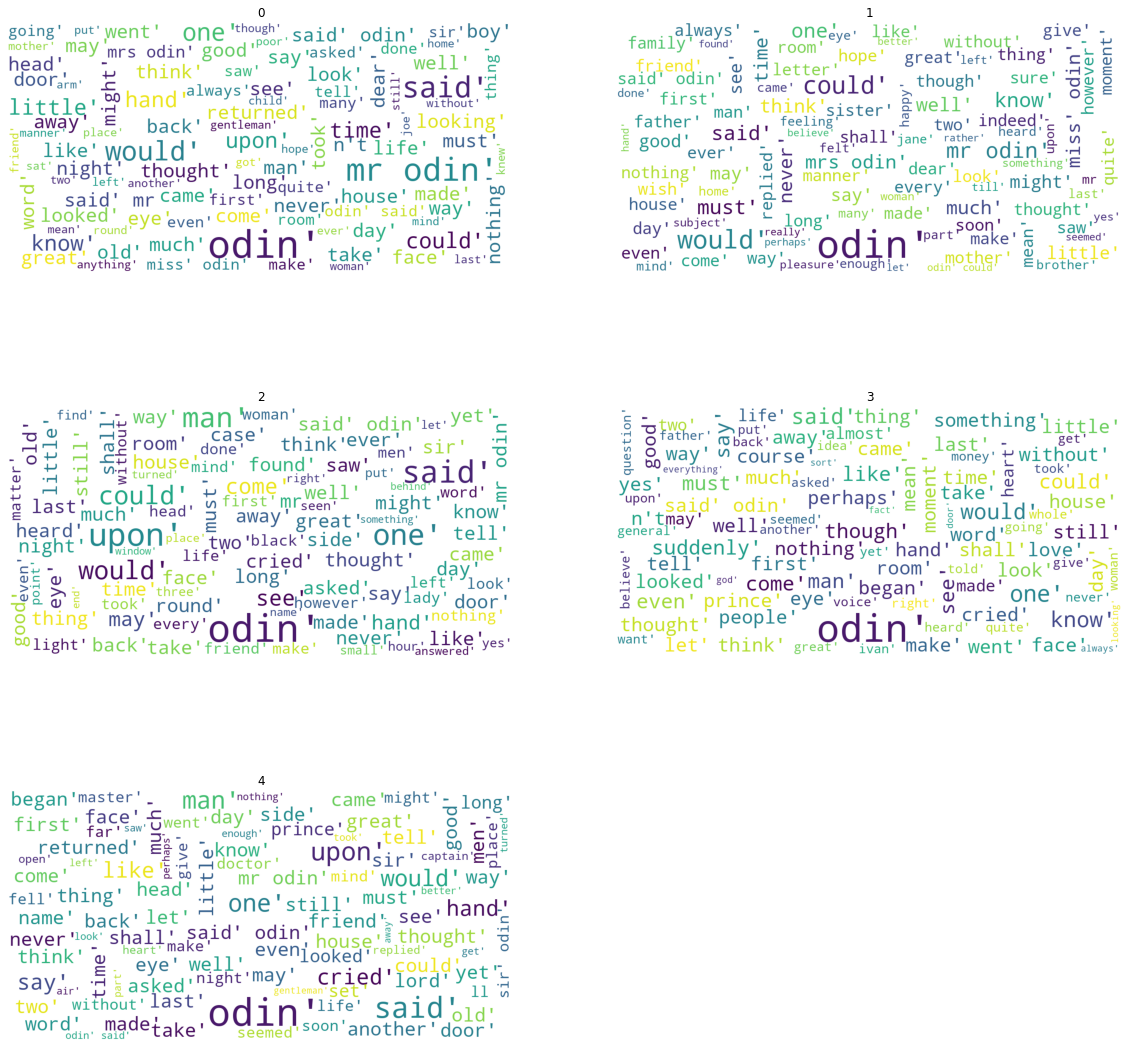

In [164]:


fig = plt.figure(figsize=(20,20)) # rows*cols 행렬의 i번째 subplot 생성
rows = 3
cols = 2

for i in range(5):
    wordcloud = plot_wordcloud(train[train['author']==i]['text_l'])
    ax = fig.add_subplot(rows, cols, i+1)
    
    #fig = plt.figure(1, figsize=(12, 12))
    ax.axis('off')
    ax.set_title(i)
    ax.imshow(wordcloud)
    #plt.show()

### 명사만

In [165]:

import nltk
nltk.download('averaged_perceptron_tagger')

def plot_wordcloud_noun(text,tags=['NN','NNP']):
    

    def _preprocess_text(text,tags):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]
            words=[lem.lemmatize(w) for w in words if len(w)>2]
            
            tagged = nltk.pos_tag(words)
            allnoun = [word for word, pos in tagged if pos in tags]

            corpus.append(allnoun)
        return corpus
    
    corpus=_preprocess_text(text,tags)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))
    
    return wordcloud

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


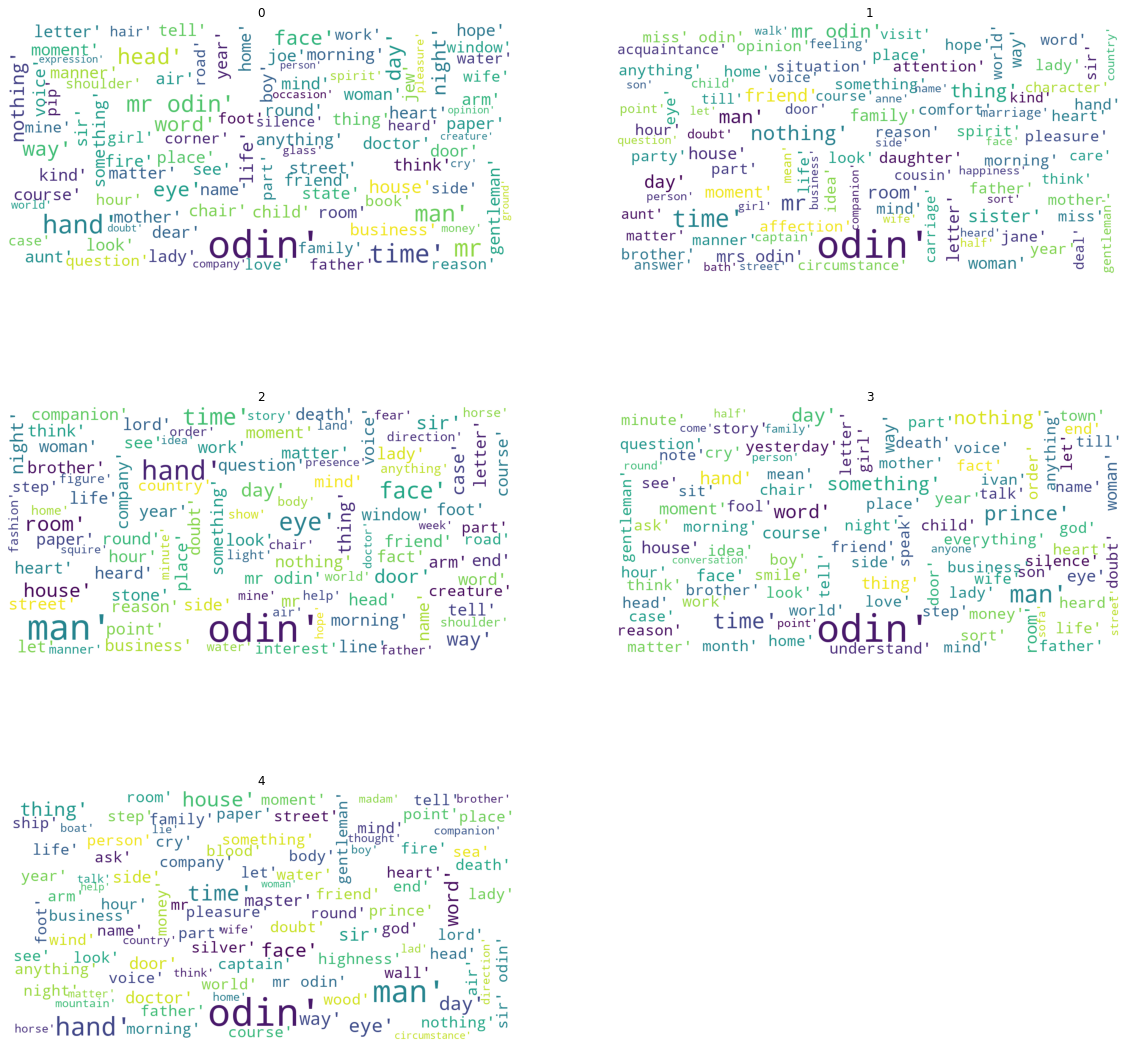

In [166]:
fig = plt.figure(figsize=(20,20)) # rows*cols 행렬의 i번째 subplot 생성
rows = 3
cols = 2

for i in range(5):
    wordcloud = plot_wordcloud_noun(train[train['author']==i]['text_l'], ['NN','NNP'])
    ax = fig.add_subplot(rows, cols, i+1)
    ax.axis('off')
    ax.set_title(i)
    ax.imshow(wordcloud)
    

### test data wordcloud

In [100]:
wordcloud = plot_wordcloud_noun(test['text_l'])

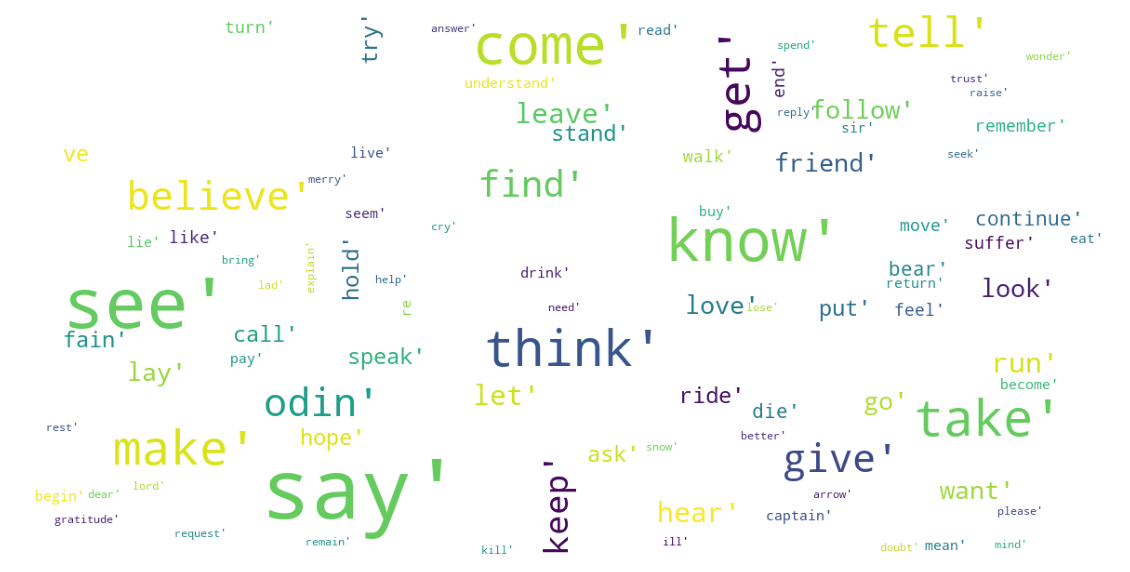

In [103]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.axis('off')
ax.imshow(wordcloud)


### 동사만

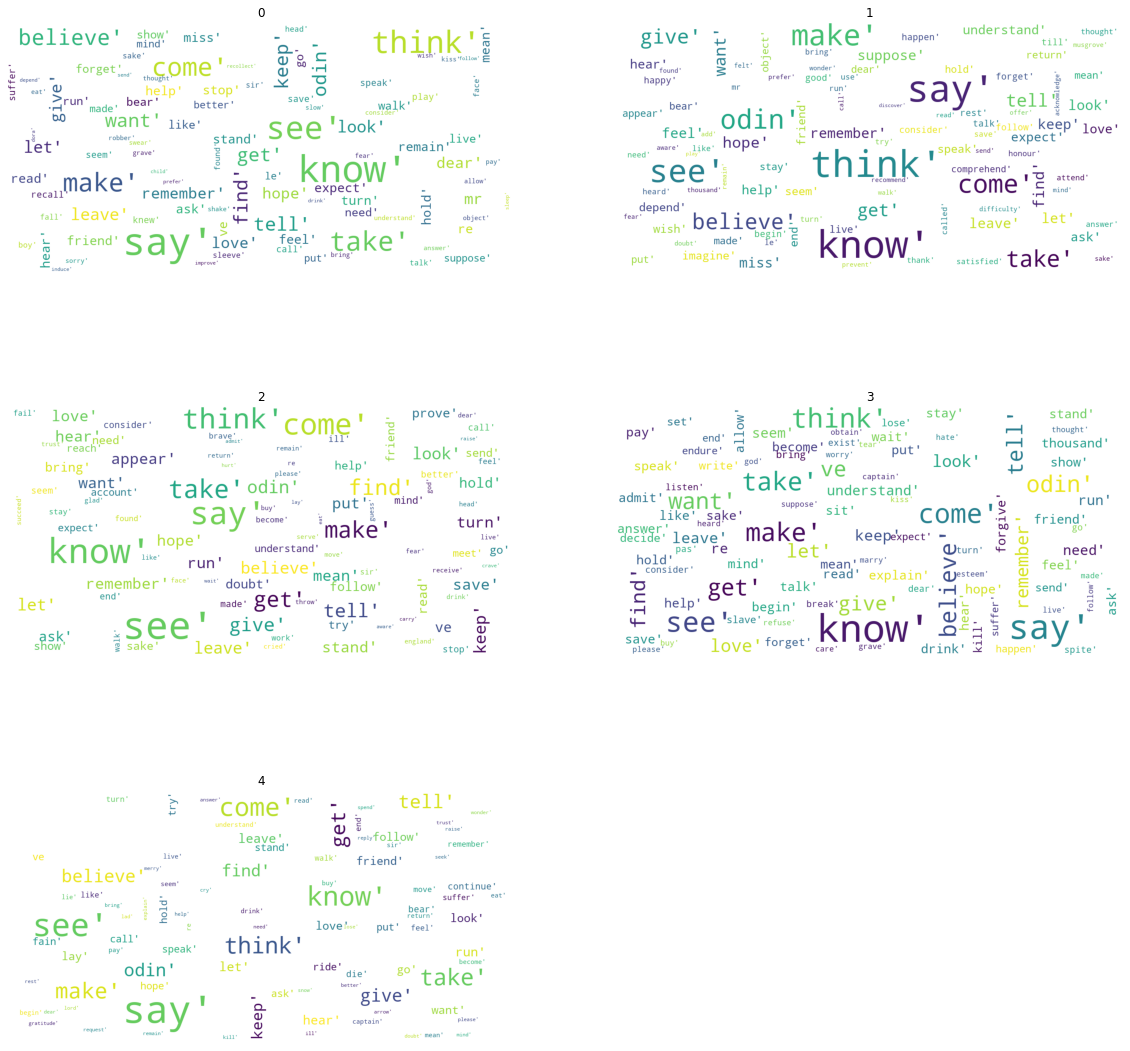

In [167]:
fig = plt.figure(figsize=(20,20)) # rows*cols 행렬의 i번째 subplot 생성
rows = 3
cols = 2

for i in range(5):
    wordcloud = plot_wordcloud_noun(train[train['author']==i]['text_l'], ['VB','VBP'])
    ax = fig.add_subplot(rows, cols, i+1)
    ax.axis('off')
    ax.set_title(i)
    ax.imshow(wordcloud)

### test data 동사 wordcloud

In [104]:
wordcloud = plot_wordcloud_noun(test['text_l'], ['VB','VBP'])

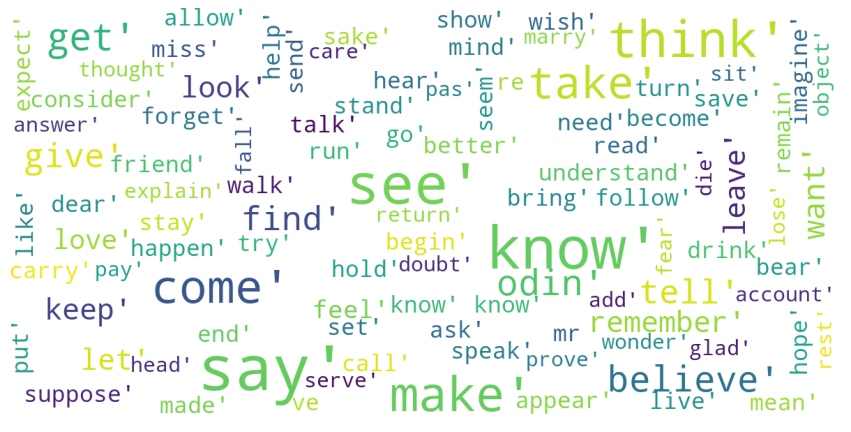

In [105]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.axis('off')
ax.imshow(wordcloud)

## Sentiment analysis (감정분석?)

### Textblob

Textblob is a python library built on top of nltk. It has been around for some time and is very easy and convenient to use.

The sentiment function of TextBlob returns two properties:

- polarity: is a floating-point number that lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

- subjectivity: refers to how someone’s judgment is shaped by personal opinions and feelings. Subjectivity is represented as a floating-point value which lies in the range of [0,1].

In [106]:
from textblob import TextBlob
TextBlob('100 people killed in Iraq').sentiment

Sentiment(polarity=-0.2, subjectivity=0.0)

In [107]:
from textblob import TextBlob
    
def plot_polarity_histogram(text):
    
    def _polarity(text):
        return TextBlob(text).sentiment.polarity
        
    polarity_score = text.apply(lambda x : _polarity(x))
    return polarity_score


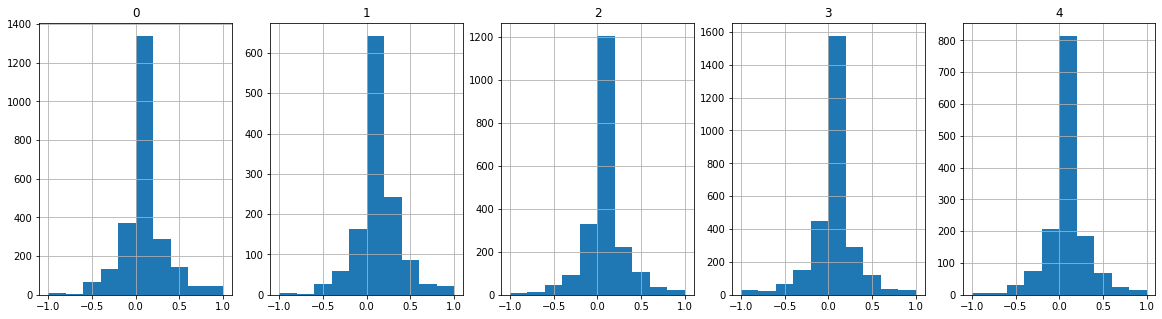

In [168]:

fig = plt.figure(figsize=(20,5)) # rows*cols 행렬의 i번째 subplot 생성
rows = 1
cols = 5

for i in range(5):
    polarity_score = plot_polarity_histogram(train[train['author']==i]['text_l'])
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(i)
    polarity_score.hist()

- 1번 작가가 다른 작가들과 다르게 0.0~0.5 점수가 더 많은 듯..

### test data polarity

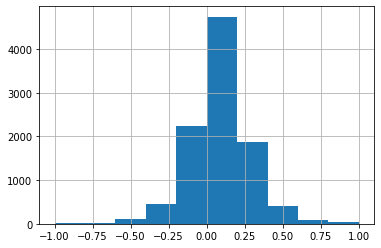

In [113]:
polarity_score = plot_polarity_histogram(test['text_l'])
polarity_score.hist()

- test는 역시 전체가 섞여있어서 분포가 평균인 것 같다.

In [114]:
def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)
    ss.pop('compound')
    return max(ss, key=ss.get)

def sentiment_textblob(text):
        x = TextBlob(text).sentiment.polarity
        
        if x<0:
            return 'neg'
        elif x==0:
            return 'neu'
        else:
            return 'pos'

def plot_sentiment_barchart(text, method='TextBlob'):
    if method == 'TextBlob':
        sentiment = text.map(lambda x: sentiment_textblob(x))
    elif method == 'Vader':
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
        sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    else:
        raise ValueError('Textblob or Vader')
    
    return sentiment

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

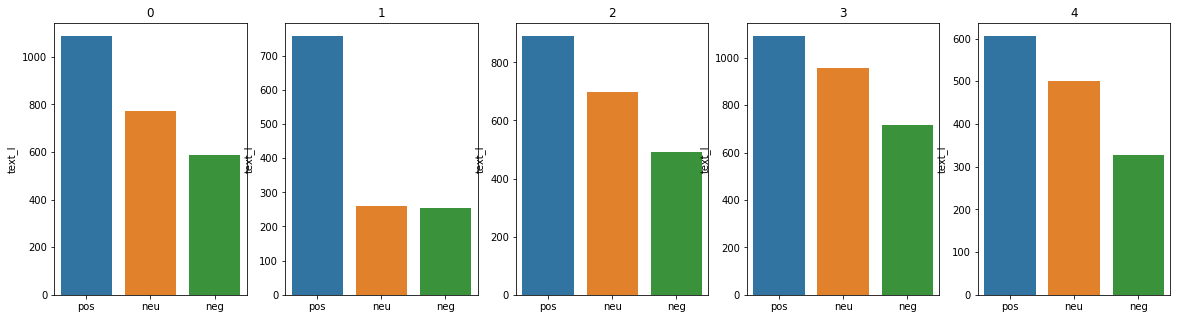

In [170]:
fig = plt.figure(figsize=(20,5)) # rows*cols 행렬의 i번째 subplot 생성
rows = 1
cols = 5

for i in range(5):
    sentiment = plot_sentiment_barchart(train[train['author']==i]['text_l'])
    ax = fig.add_subplot(rows, cols, i+1)
    #plt.bar(sentiment.value_counts().index, sentiment.value_counts())
    ax.set_title(i)
    sns.barplot(sentiment.value_counts().index, sentiment.value_counts())

### test data sentiment

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


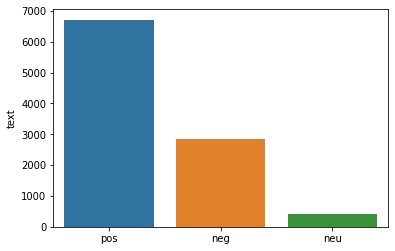

In [115]:
sentiment = plot_sentiment_barchart(test['text'])
sns.barplot(sentiment.value_counts().index, sentiment.value_counts())

## Named Entity Recognition (개체명인식 NER)

### spaCy

spaCy provides many other functionalities like pos tagging, word to vector transformation, etc.

In [118]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [119]:
doc=nlp('India and Iran have agreed to boost the economic viability \
of the strategic Chabahar port through various measures, \
including larger subsidies to merchant shipping firms using the facility, \
people familiar with the development said on Thursday.')

[(x.text,x.label_) for x in doc.ents]

[('India', 'GPE'),
 ('Iran', 'GPE'),
 ('Chabahar', 'PERSON'),
 ('Thursday', 'DATE')]

In [120]:
import spacy
from collections import  Counter
import seaborn as sns

def plot_named_entity_barchart(text):
    nlp = spacy.load("en_core_web_sm")
    
    def _get_ner(text):
        doc=nlp(text)
        return [X.label_ for X in doc.ents]
    
    ent=text.apply(lambda x : _get_ner(x))
    ent=[x for sub in ent for x in sub]
    counter=Counter(ent)
    count=counter.most_common()
    
    x,y=map(list,zip(*count))
    return x,y

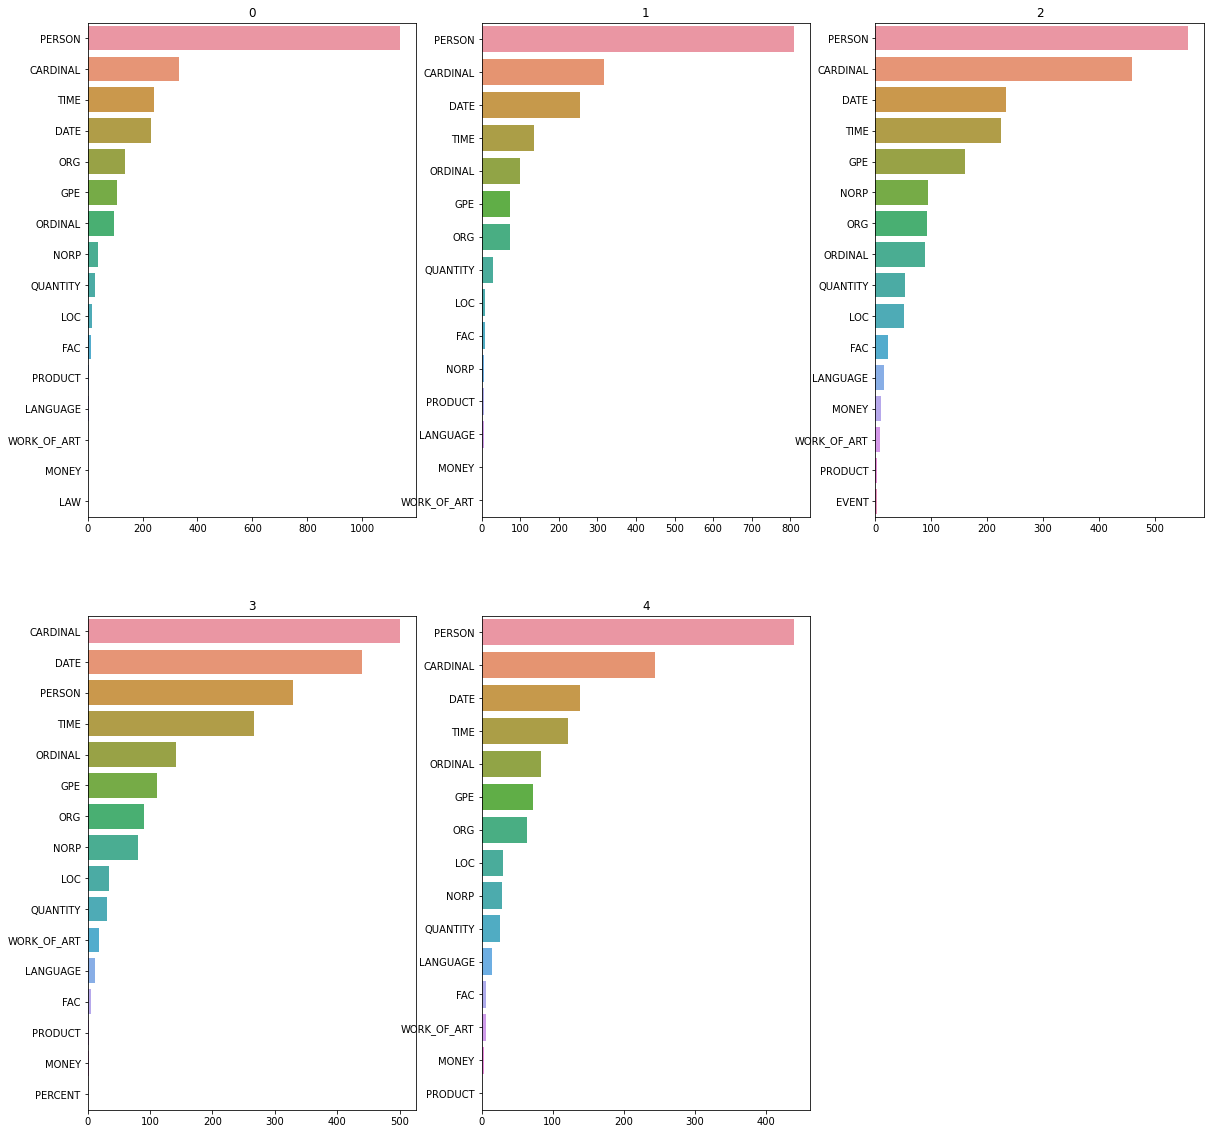

In [171]:
fig = plt.figure(figsize=(20,20)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3

for i in range(5):
    x, y = plot_named_entity_barchart(train[train['author']==i]['text_l'])
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(i)
    sns.barplot(x=y,y=x)

### 사람이름 분포

In [122]:
import spacy
from collections import  Counter
import seaborn as sns

def plot_most_common_named_entity_barchart(text, entity="PERSON"):
    nlp = spacy.load("en_core_web_sm")
    
    def _get_ner(text,ent):
        doc=nlp(text)
        return [X.text for X in doc.ents if X.label_ == ent]

    entity_filtered=text.apply(lambda x: _get_ner(x,entity))
    entity_filtered=[i for x in entity_filtered for i in x]
    
    counter=Counter(entity_filtered)
    x,y=map(list,zip(*counter.most_common(10)))
    return x,y

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

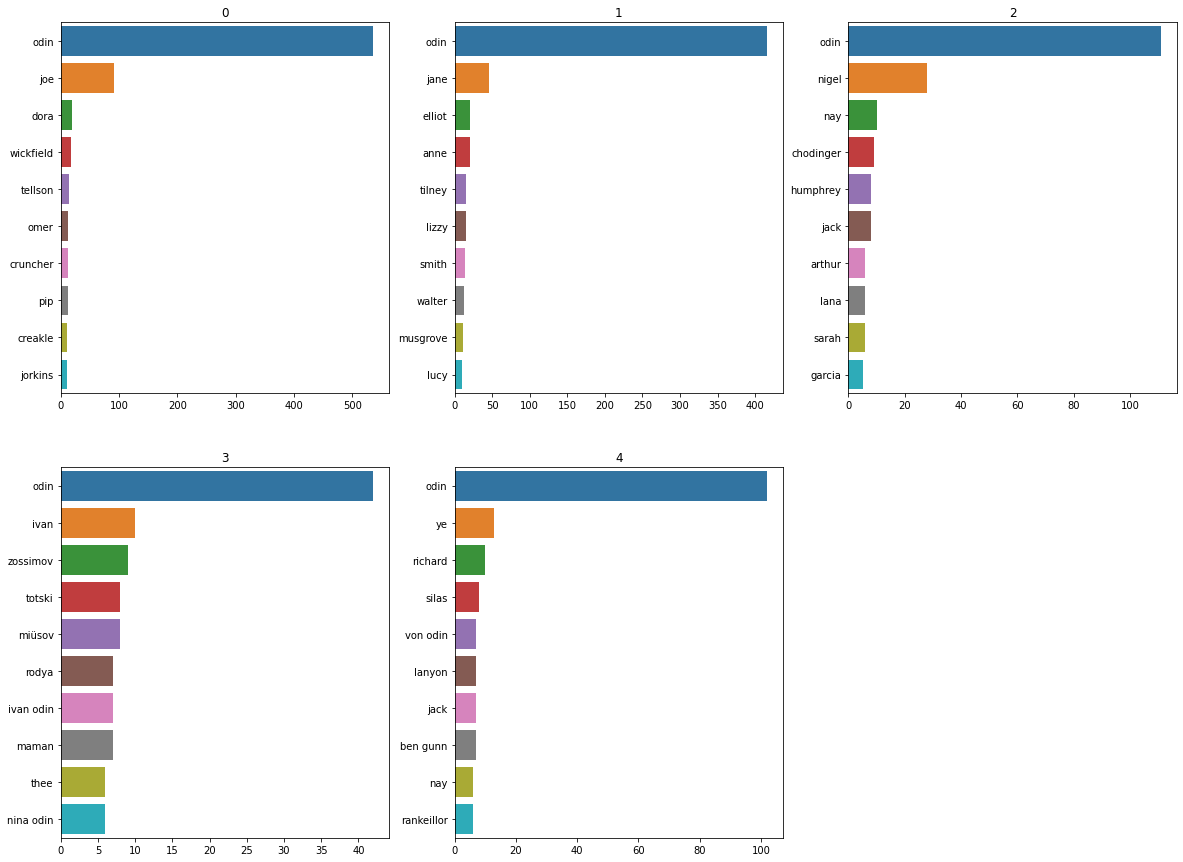

In [124]:
fig = plt.figure(figsize=(20,15)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3

for i in range(5):
    x, y = plot_most_common_named_entity_barchart(train[train['author']==i]['text_l'], entity="PERSON")
    ax = fig.add_subplot(rows, cols, i+1)
    sns.barplot(y,x).set_title(i)

## Exploration through Parts of Speach Tagging in python

In [125]:
import nltk
sentence="The greatest comeback stories in 2019"
tokens=word_tokenize(sentence)
nltk.pos_tag(tokens)

[('The', 'DT'),
 ('greatest', 'JJS'),
 ('comeback', 'NN'),
 ('stories', 'NNS'),
 ('in', 'IN'),
 ('2019', 'CD')]

In [127]:
doc = nlp('The greatest comeback stories in 2019')
from spacy import displacy
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

In [ ]:
# Code Snippet for Most Common Part of Speach Barchart



import re
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;_]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
from collections import Counter

nltk.download('averaged_perceptron_tagger')

def plot_most_common_part_of_speach_barchart(text, part_of_speach='NN'):
    
    def _filter_pos(text):
        pos_type=[]

        text = clean_text(text)
        
        pos=nltk.pos_tag(word_tokenize(text))
        for word,tag in pos:
            if tag==part_of_speach:
                pos_type.append(word)
        return pos_type

    words=text.apply(lambda x : _filter_pos(x))
    words=[x for l in words for x in l]
    counter=Counter(words)
    x,y=list(map(list,zip(*counter.most_common(7))))
    return x,y

### 명사 분포

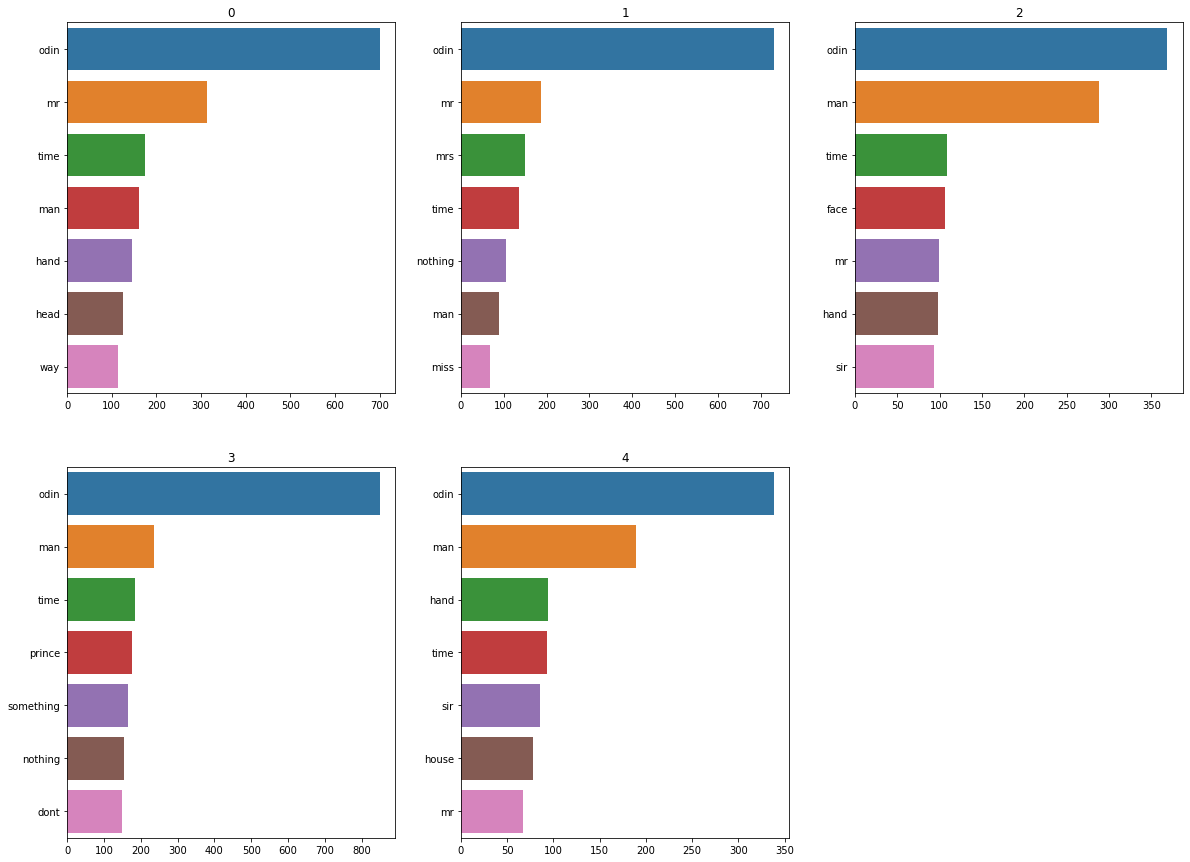

In [138]:
fig = plt.figure(figsize=(20,15)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3

for i in range(5):
    x, y = plot_most_common_part_of_speach_barchart(train[train['author']==i]['text_l'], part_of_speach='NN')
    ax = fig.add_subplot(rows, cols, i+1)
    sns.barplot(x=y,y=x).set_title(i)

### 명사(NNP) 분포

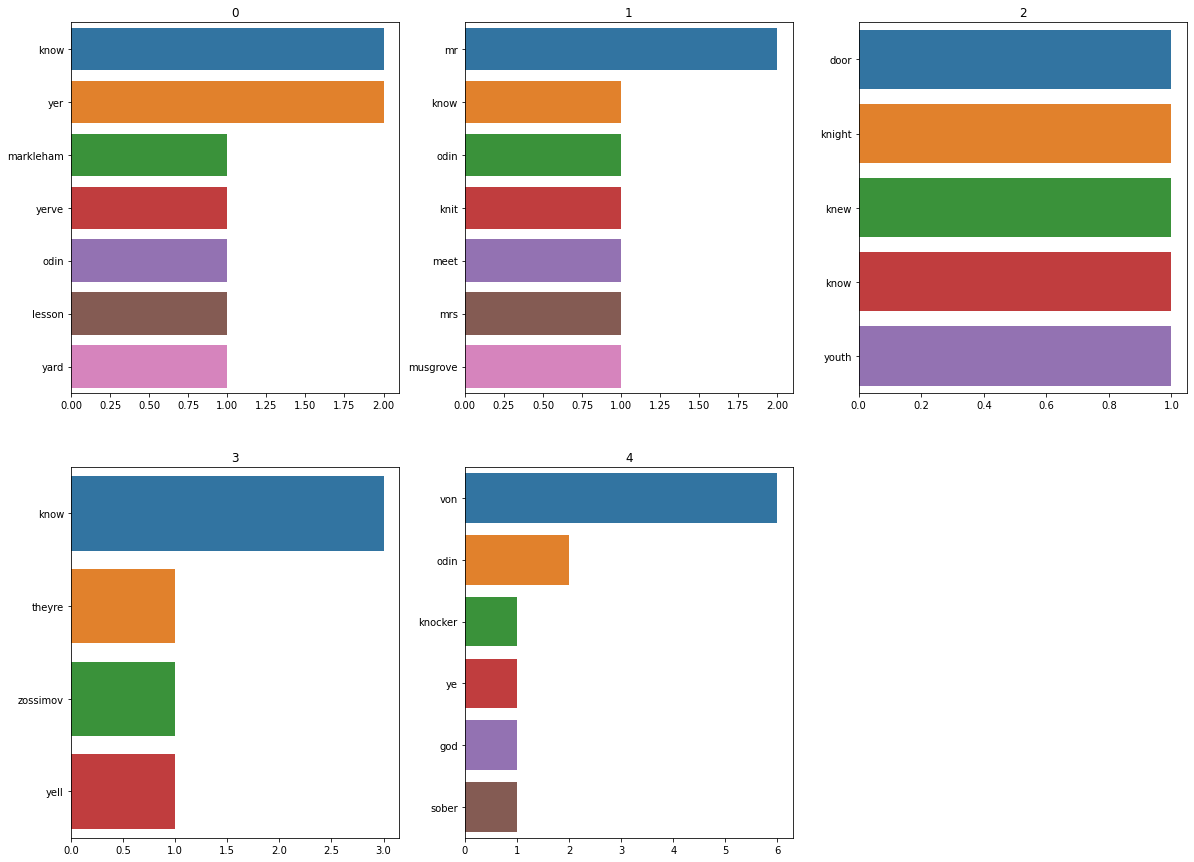

In [139]:
fig = plt.figure(figsize=(20,15)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3

for i in range(5):
    x, y = plot_most_common_part_of_speach_barchart(train[train['author']==i]['text_l'], part_of_speach='NNP')
    ax = fig.add_subplot(rows, cols, i+1)
    sns.barplot(x=y,y=x).set_title(i)

## Exploring through text complexity

### Textstat

Textstat is a cool Python library that provides an implementation of all these text statistics calculation methods. Let’s use Textstat to implement Flesch Reading Ease index.

In [141]:
!pip install textstat

     |████████████████████████████████| 102kB 4.4MB/s 
     |████████████████████████████████| 1.9MB 11.5MB/s 


In [142]:
from textstat import flesch_reading_ease

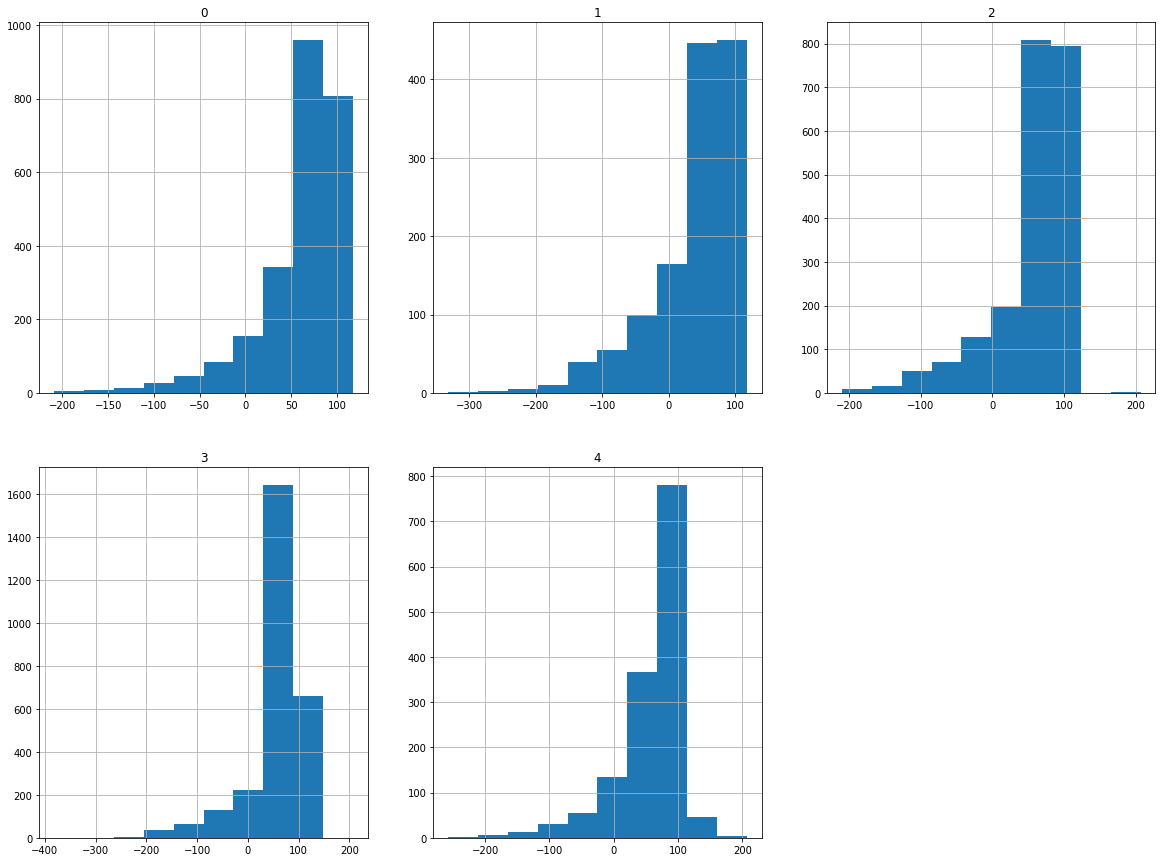

In [145]:
fig = plt.figure(figsize=(20,15)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3

for i in range(5):
    text = train[train['author']==i]['text_l']
    ax = fig.add_subplot(rows, cols, i+1)
    text.apply(lambda x : flesch_reading_ease(x)).hist().set_title(i)

https://github.com/shivam5992/textstat

|Score	|Difficulty|
|---|---|
90-100|	Very Easy
80-89	|Easy
70-79	|Fairly Easy
60-69	|Standard
50-59	|Fairly Difficult
30-49	|Difficult
0-29	|Very Confusing




In [151]:
for i in range(12):
  print(flesch_reading_ease(train.iloc[i]['text_l']), train.iloc[i]['author'], train.iloc[i]['text_l'])

50.17 3 he was almost choking. there was so much, so much he wanted to say, but strange exclamations were all that came from his lips. the pole gazed fixedly at him, at the bundle of notes in his hand; looked at odin, and was in evident perplexity.
81.29 2 “your sister asked for it, i suppose?”
39.0 1  she was engaged one day as she walked, in perusing jane’s last letter, and dwelling on some passages which proved that jane had not written in spirits, when, instead of being again surprised by mr. odin, she saw on looking up that odin was meeting her. putting away the letter immediately and forcing a smile, she said:
37.99 4 the captain was in the porch, keeping himself carefully out of the way of a treacherous shot, should any be intended. he turned and spoke to us, “doctor's watch on the lookout. dr. odin take the north side, if you please; jim, the east; gray, west. the watch below, all hands to load muskets. lively, men, and careful.”
57.27 3 “have mercy, gentlemen!” odin flung up h

### 평균

In [152]:
for i in range(5):
    text = train[train['author']==i]['text_l']
    print(i, text.apply(lambda x : flesch_reading_ease(x)).mean())

0 60.42369130257248
1 38.6261381475667
2 56.665754807692316
3 57.17402099167578
4 58.372684797768514


### max

In [153]:
for i in range(5):
    text = train[train['author']==i]['text_l']
    print(i, text.apply(lambda x : flesch_reading_ease(x)).max())

0 117.16
1 117.16
2 206.84
3 206.84
4 206.84


### min

In [154]:
for i in range(5):
    text = train[train['author']==i]['text_l']
    print(i, text.apply(lambda x : flesch_reading_ease(x)).min())

0 -208.67
1 -331.82
2 -209.68
3 -381.22
4 -257.39


<center><font size=6>Thanks to</font>

![image](https://i2.wp.com/neptune.ai/wp-content/uploads/2020/05/Shahul-Es.png?ssl=1)

Shahul Es

Freelance Data Scientist | Kaggle Master
</center>



